In [232]:
import numpy

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import os
import cv2
from PIL import Image
from patchify import patchify
import random


In [234]:

import torch
import tensorflow as tf

In [235]:
dataset_root_folder = "/Users/claire.guillaume/Downloads/dataset"

In [236]:
for path, subdirs, files in os.walk(dataset_root_folder):
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if dir_name == 'masks':
        images = os.listdir(path)
        print(images)

['image_part_004.png', 'image_part_005.png', 'image_part_007.png', 'image_part_006.png', 'image_part_002.png', 'image_part_003.png', 'image_part_001.png', 'image_part_008.png', 'image_part_009.png']
['image_part_004.png', 'image_part_005.png', 'image_part_007.png', 'image_part_006.png', 'image_part_002.png', 'image_part_003.png', 'image_part_001.png', 'image_part_008.png', 'image_part_009.png']
['image_part_004.png', 'image_part_005.png', 'image_part_007.png', 'image_part_006.png', 'image_part_002.png', 'image_part_003.png', 'image_part_001.png', 'image_part_008.png', 'image_part_009.png']
['image_part_004.png', 'image_part_005.png', 'image_part_007.png', 'image_part_006.png', 'image_part_002.png', 'image_part_003.png', 'image_part_001.png', 'image_part_008.png', 'image_part_009.png']
['image_part_004.png', 'image_part_005.png', 'image_part_007.png', 'image_part_006.png', 'image_part_002.png', 'image_part_003.png', 'image_part_001.png', 'image_part_008.png', 'image_part_009.png']
['ima

In [237]:
image_patch_size = 256

In [238]:
image = cv2.imread(f'{dataset_root_folder}/Tile 1/images/image_part_001.jpg', 1)

In [239]:
print(type(image))


<class 'numpy.ndarray'>


In [240]:
#
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step = image_patch_size)

In [241]:
len(image_patches)

2

In [242]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [243]:
minmaxscaler = MinMaxScaler()

In [244]:
image_x = image_patches[0,0,:,:]

#MinMaxScaler

image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [245]:
image_y[0].shape

(256, 256, 3)

In [246]:
# images are n_dimensional arrays
# (x,y,z) = (height, width, colour_type)
# colour_type can be : i) Grayscale ii) RGB

# print(image)
print(image.shape)

(644, 797, 3)


In [247]:
(image.shape[1] // image_patch_size) * image_patch_size

768

- In the case above, we selected a particular image "image_part_001.jpg".
- Each image in each folder in each tile has a unique dimension (x,y,z)
- But all the images need to be made uniform.

- Each title contains images (both images ad masks) with the same dimensions
- We need to decide a patch size (256x256 or 512x512)
- We need to make sure all tiles and masks image sizes are muliples of this patch size

In [248]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:

    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'

    for tile_id in range(1, 8):
        for image_id in range(1,20):
            image = cv2.imread(f'{dataset_root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
            if image is not None:
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                size_x = (image.shape[1] // image_patch_size) * image_patch_size
                size_y = (image.shape[0] // image_patch_size) * image_patch_size
                #print(f"{image.shape} --- {size_x} - {size_y}")  # To know the end of a particular tile
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step = image_patch_size)
                #print(len(patched_images))
                #print("({}, {})".format(image.size[0], image.size[1]))

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):

                        if image_type == 'images':

                            individual_patched_image = patched_images[i,j,:,:]
                            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
                            individual_patched_image = individual_patched_image[0]
                            image_dataset.append(individual_patched_image)

                        elif image_type == 'masks':

                            individual_patched_mask = patched_images[i,j,:,:]
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)

[ WARN:0@161856.958] global loadsave.cpp:241 findDecoder imread_('/Users/claire.guillaume/Downloads/dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161856.958] global loadsave.cpp:241 findDecoder imread_('/Users/claire.guillaume/Downloads/dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161856.958] global loadsave.cpp:241 findDecoder imread_('/Users/claire.guillaume/Downloads/dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161856.958] global loadsave.cpp:241 findDecoder imread_('/Users/claire.guillaume/Downloads/dataset/Tile 1/images/image_part_0013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161856.958] global loadsave.cpp:241 findDecoder imread_('/Users/claire.guillaume/Downloads/dataset/Tile 1/images/image_part_0014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@161856.958] global loadsav

In [249]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [250]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [251]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


- We now finally will look at the images.


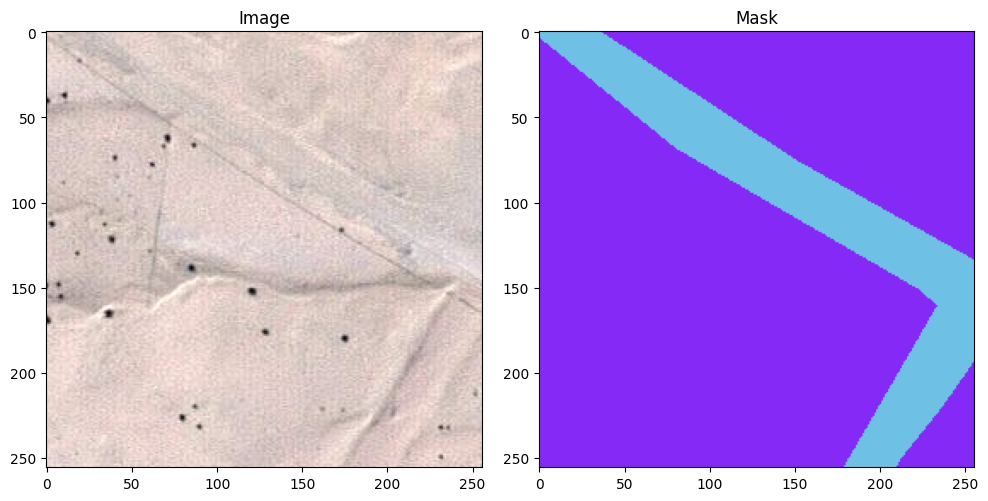

In [252]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image_dataset[random_image_id])
plt.title("Image")
#plt.axis("off")  # Remove axes for better visualization

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(mask_dataset[random_image_id])
plt.title("Mask")
#plt.axis("off")  # Remove axes for better visualization

plt.tight_layout()
plt.show()

#### Processing Mask Image Labels
#### Applying One-hot encoding with labels hex Imahe type to set RGB/Label

In [253]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))# converting 3C1098 to its hexadecimal equivalent.
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))# converting 3C1098 to its hexadecimal equivalent.
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))# converting 3C1098 to its hexadecimal equivalent.
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))# converting 3C1098 to its hexadecimal equivalent.
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))# converting 3C1098 to its hexadecimal equivalent.
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))# converting 3C1098 to its hexadecimal equivalent.
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [254]:
mask_dataset.shape

(945, 256, 256, 3)

In [255]:
def rbg_to_label(label):
    label_segment = np.zeros(label.shape, dtype = np.uint8)
    label_segment[np.all(label == class_water, axis = -1)] = 0
    label_segment[np.all(label == class_land, axis = -1)] = 1
    label_segment[np.all(label == class_road, axis = -1)] = 2
    label_segment[np.all(label == class_building, axis = -1)] = 3
    label_segment[np.all(label == class_vegetation, axis = -1)] = 4
    label_segment[np.all(label == class_unlabeled, axis = -1)] = 5
    label_segment = label_segment[:,:,0]
    return label_segment

In [256]:
mask_dataset.shape

(945, 256, 256, 3)

It means it has 945 RGB(denoted by the 3 in the end) images of size 256 x 256.

In [257]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rbg_to_label(mask_dataset[i])
    labels.append(label)

In [258]:
labels = np.array(labels)

In [259]:
labels = np.expand_dims(labels, axis = 3)

In [260]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [261]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

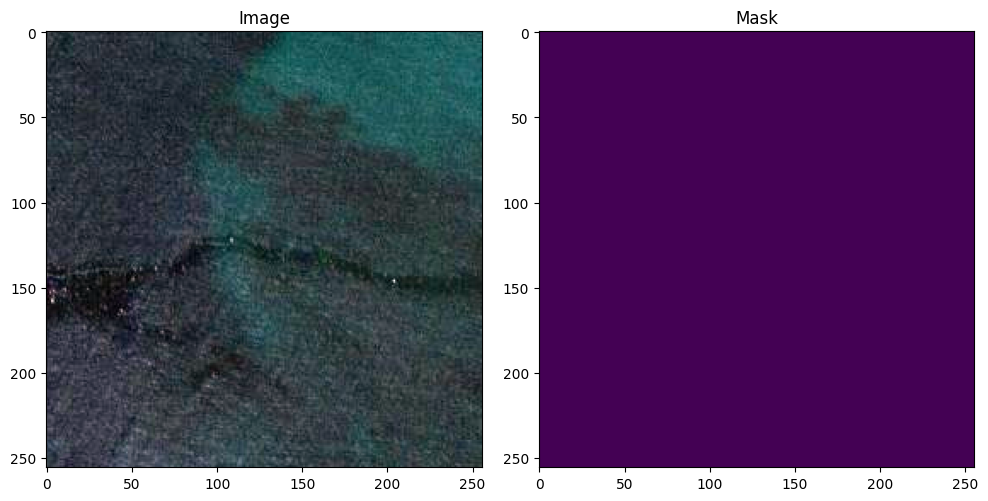

In [262]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image_dataset[random_image_id])
plt.title("Image")
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(labels[random_image_id][:,:,0])
plt.title("Mask")

plt.tight_layout()
plt.show()

Creating training and testing datasets

In [263]:
master_training_dataset = image_dataset

In [264]:
from tensorflow.keras.utils import to_categorical

In [265]:
total_classes = len(np.unique(labels))

In [266]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [267]:

labels_categorical_dataset.shape

(945, 256, 256, 6)

In [268]:
master_training_dataset.shape

(945, 256, 256, 3)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=.15, random_state=100)

In [270]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [271]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]

In [272]:
print(image_height)
print(image_width)
print(image_channels)

256
256
3


# Deep Learning Implementation on Satellite Image Data

In [273]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [274]:
from tensorflow.keras import backend as K



### Setting up Evaluation Metrics

#### Jaccard Index / Intersection over Union (IoU)

$$
\text{IoU} = \frac{\text{Overlap}}{\text{Union}}
$$


In [275]:
# math to generate the Jaccard Index

def jaccard_coeff(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

In [276]:
#Building the deep learning moel
# Original network was build for biomedical imaging

def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

    inputs = Input((image_height, image_width, image_channels))

    # Now we build the first convolutional 2D layer
    # 16 filtered, Kernel size = (3,3), Activation = None

    source_input = inputs

    c1 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1) # The dropout rate (here 0.2) can be experimented with.
    c1 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c5)
    p5 = MaxPooling2D((2,2))(c5)

    u6 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(c5)
    u6 = concatenate([u6,c4])
    c6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(c6)
    u7 = concatenate([u7,c3])
    c7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(c7)
    u8 = concatenate([u8,c2])
    c8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(c8)
    u9 = concatenate([u9,c1], axis = 3) #Default axis = 1, needs to be changed to 3.
    c9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1,1), activation = "softmax")(c9) # Softmax best for classfication tasks
    model = Model(inputs = [inputs], outputs = [outputs])

    return model


In [277]:
metrics = ["accuracy", jaccard_coeff]

In [278]:
def get_deep_learning_model():
    return multi_unet_model(n_classes=total_classes,
                            image_height=image_height,
                            image_width=image_width,
                            image_channels=image_channels)


In [279]:
model = get_deep_learning_model()

In [280]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'cla

## Loss Function : Focal Loss (Cross Entropy Loss Extension)

##### Equal class weights --> Dice Loss --> Focal Loss --> Total Loss --> Dice Loss + (1 * Focal Loss)

In [281]:
weights = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]

In [282]:
!pip install -U segmentation-models

In [283]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


In [284]:

import segmentation_models as sm

In [285]:
diceloss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = diceloss + (1 * focal_loss)

Model Compilation


In [286]:
tf.keras.backend.clear_session()

In [287]:
model.compile(optimizer="adam", loss = total_loss, metrics = metrics)

In [288]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,580,614 (6.03 MB)

 Trainable params: 1,580,614 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [289]:
model_history = model.fit(X_train, y_train,
                          batch_size = 16,
                          verbose = 1,
                          epochs = 100,
                          validation_data = (X_test, y_test),
                          shuffle = False)

Epoch 1/100


/Users/claire.guillaume/Documents/Analyse_simulation/vishrutpro/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


51/51 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.2478 - jaccard_coeff: 0.1225 - loss: 1.0352 - val_accuracy: 0.6352 - val_jaccard_coeff: 0.3499 - val_loss: 0.9978
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6619 - jaccard_coeff: 0.3201 - loss: 0.9934 - val_accuracy: 0.6966 - val_jaccard_coeff: 0.4345 - val_loss: 0.9703
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6968 - jaccard_coeff: 0.4467 - loss: 0.9680 - val_accuracy: 0.7102 - val_jaccard_coeff: 0.4510 - val_loss: 0.9652
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7203 - jaccard_coeff: 0.4781 - loss: 0.9610 - val_accuracy: 0.7439 - val_jaccard_coeff: 0.4442 - val_loss: 0.9577
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7484 - jaccard_coeff: 0.4888 - loss: 0.9558 - val_accuracy: 0.7094 - val_jaccard_coeff: 0.4526 - val_loss: 0.9627
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7544 - jaccard_coeff: 0.5053 - loss: 0.9528 - val_ac

In [290]:
history_a = model_history

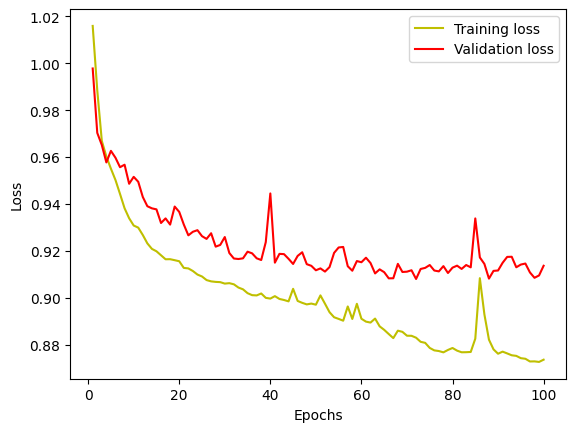

In [291]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

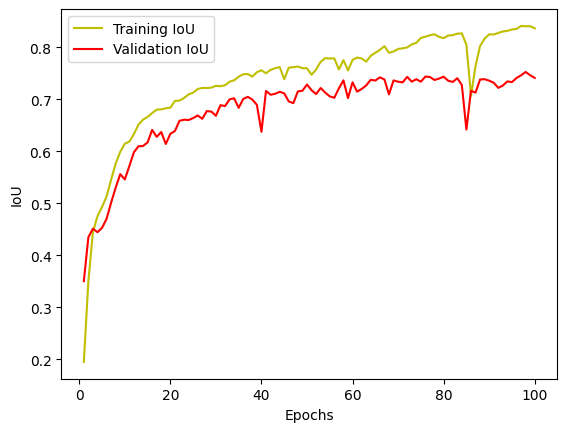

In [292]:
jaccard_coeff = history_a.history['jaccard_coeff']
val_jaccard_coeff = history_a.history['val_jaccard_coeff']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, jaccard_coeff, 'y', label = 'Training IoU')
plt.plot(epochs, val_jaccard_coeff, 'r', label = 'Validation IoU')
plt.xlabel("Epochs")
plt.ylabel("IoU")
plt.legend()
plt.show()

In [293]:
val_loss

[0.9977817535400391,
 0.9703454971313477,
 0.9651707410812378,
 0.9577378034591675,
 0.9626691341400146,
 0.9597384929656982,
 0.9557018280029297,
 0.9567636847496033,
 0.948635995388031,
 0.9515920281410217,
 0.9494855403900146,
 0.9430074691772461,
 0.9390700459480286,
 0.938161313533783,
 0.9377263188362122,
 0.9319202303886414,
 0.9338778853416443,
 0.9312302470207214,
 0.9389269351959229,
 0.936646580696106,
 0.9312770962715149,
 0.9266603589057922,
 0.9281795620918274,
 0.9288569688796997,
 0.9263038039207458,
 0.9251359701156616,
 0.9275527596473694,
 0.9218379259109497,
 0.9225671291351318,
 0.9259326457977295,
 0.9191200137138367,
 0.9167754650115967,
 0.9165688157081604,
 0.9168540239334106,
 0.9196877479553223,
 0.9189839959144592,
 0.9168742895126343,
 0.9161394238471985,
 0.9237783551216125,
 0.9445164799690247,
 0.9150082468986511,
 0.9187624454498291,
 0.9186450839042664,
 0.9166536927223206,
 0.9144551157951355,
 0.9178882837295532,
 0.9194434881210327,
 0.9143666028976

In [294]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 51}

### Performance Predictions

In [295]:
y_pred = model.predict(X_test)

/Users/claire.guillaume/Documents/Analyse_simulation/vishrutpro/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step


In [296]:
len(y_pred) # number of test images

142

In [297]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [298]:
len(y_pred_argmax)

142

In [299]:
y_test_argmax = np.argmax(y_test, axis=3)

In [300]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Comparing preediction results


In [317]:
test_iamge_number = random.randint(0, len(X_test))

test_image = X_test[test_iamge_number]
ground_truth_image = y_test_argmax[test_iamge_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3) 
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


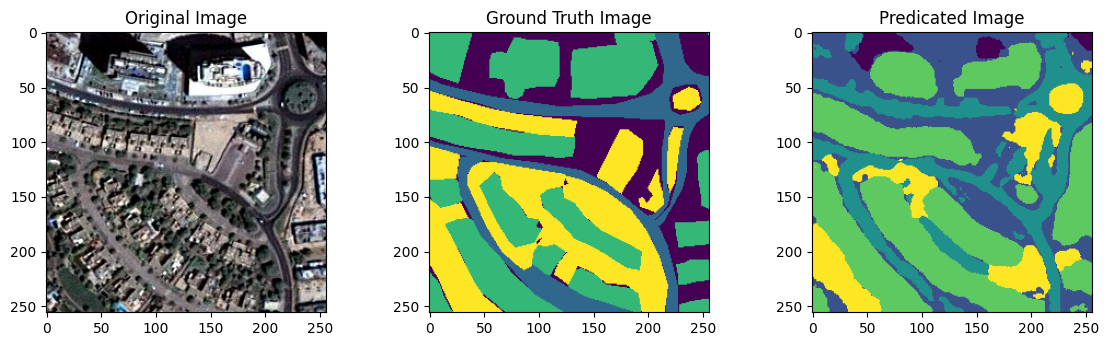

In [318]:
plt.figure(figsize = (14,8))

plt.subplot(231)
plt.title('Original Image')
plt.imshow(test_image)

plt.subplot(232)
plt.title('Ground Truth Image')
plt.imshow(ground_truth_image)

plt.subplot(233)
plt.title('Predicated Image')
plt.imshow(predicted_image)

plt.show()

### Saving the model

In [304]:
model.save("satellite_segmentation_full.h5")